In [45]:
import load_data
import matplotlib.pyplot as plt
import numpy as np

## Odometry Dead Reconing

In [46]:
WHEEL_DIAM = 254    # wheel diameter (mm)
BOT_WIDTH = 393.7   # distance from center of left wheel to center of right (mm)
SKID_FACTOR = 1.85  # made up scalar to account for effect of skid steering effective width for rotation

WHEEL_CIRC = np.pi*WHEEL_DIAM    # wheel circumference (mm)
ENC_TICK_LEN = WHEEL_CIRC / 360  # length of one encoder tick (mm)

In [47]:
def get_local_movement(R_enc_val, L_enc_val):
    """Calculates movement and angular change from encoder values with bot frame of reference

    Args:
        R_enc_val: a single reading from the right encoder
        L_enc_val: a single reading from the left encoder

    Returns:
        d_i: movement in the direction that the robot was facing
        d_j: movement perpendicular to the direction the robot was facing
        d_theta: change in angle that robot is facing
    """
    R_mm = ENC_TICK_LEN * R_enc_val  # convert encoder to right wheel movement in mm
    L_mm = ENC_TICK_LEN * L_enc_val  # convert encoder to left wheel movement in mm
    d_theta = (R_mm - L_mm) / (BOT_WIDTH * SKID_FACTOR)  # find change in angle
    d_i = (R_mm + L_mm) / 2 * np.cos(d_theta)  # motion in i direction
    d_j = (R_mm + L_mm) / 2 * np.sin(d_theta)  # motion in j direction
    return [d_i, d_j, d_theta]

In [48]:
def dead_rec_trajectory(R_enc, L_enc):
    """Estimates robot trajectory from encoder readings using dead reconning

    Args:
        R_enc: a vector of readings from the right encoder
        L_enc: a vector of readings from the left encoder
        Both encoder vectors must be equal length

    Returns:
        pose: numpy array of [x,y,theta] for every time step (len(pose) == len(R_enc) == len(L_enc))
    """
    pose = np.zeros((len(R_enc)+1,3))  # robot pose [x, y, theta]; theta is angle in radians
    for i in range(len(R_enc)):
        theta = pose[i,2]   # robot orientation angle before movement
        
        d_i, d_j, d_theta = get_local_movement(R_enc[i],L_enc[i])  # local movement
        d_x = (d_i * np.cos(theta)) + (d_j * np.sin(theta/2))  # global x movement
        d_y = (d_i * np.sin(theta)) + (d_j * np.cos(theta/2))  # global y movement
        
        pose[i+1] = pose[i] + [d_x, d_y, d_theta]  # update next robot pose using calculated changes
    return pose


In [49]:
# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, ts = load_data.get_encoder('../data/Encoders20')

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

pose20 = dead_rec_trajectory(R_enc, L_enc)

In [50]:
# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, ts = load_data.get_encoder('../data/Encoders23')

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

pose23 = dead_rec_trajectory(R_enc, L_enc)

Text(0, 0.5, 'y (mm)')

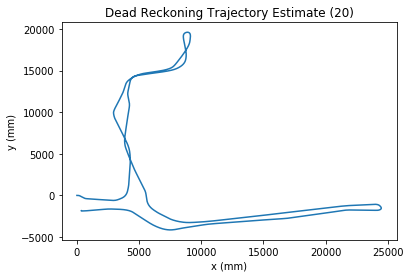

In [51]:
plt.plot(pose20[:,0],pose20[:,1])
plt.title('Dead Reckoning Trajectory Estimate (20)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

Text(0, 0.5, 'y (mm)')

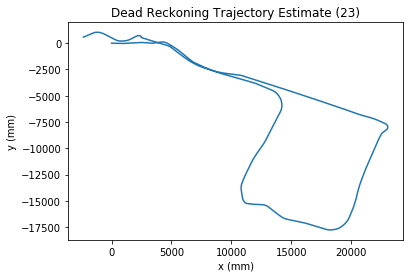

In [52]:
plt.plot(pose23[:,0],pose23[:,1])
plt.title('Dead Reckoning Trajectory Estimate (23)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

In [63]:
acc_x, acc_y, _, gyro_x, gyro_y, _, imu_ts = load_data.get_imu('../data/imu20')	

## LIDAR Mapping

In [114]:
def get_ray_end_coords(length,theta):
    """ find gridmap coords of terminal point of ray

    Args:
        length: magnitude of ray (okay technically line segment but w/e)
                length should be given in units of grid squares
        theta: angle of ray

    Returns:
        (x,y): coordinates of terminal point
    """
    x = np.floor(length*np.cos(theta))
    y = np.floor(length*np.sin(theta))
    return np.asarray([x,y],dtype=np.int16)


In [84]:
lidar20 = load_data.get_lidar('../data/Hokuyo20')

In [132]:
scan20_dm = 10 * lidar20[0]['scan']  # lidar ranges in decimeters (resolution of grid)
theta20 = np.squeeze(lidar20[0]['angle'])
occupied_coords = get_ray_end_coords(scan20_dm,theta20)  # coords where lidar was reflected 
                                                         # (probbaly stuff here)

In [133]:
occ_grid_map = np.zeros(np.ptp(occupied_coords,axis=1).astype(np.int16))

In [127]:
np.min(gc,axis=1)

array([-35, -46], dtype=int16)

In [122]:
gc_shift = gc + np.min(0,np.abs(np.min(gc,axis=1))) #shift

AttributeError: 'numpy.ndarray' object has no attribute 'uniques'

In [121]:
ogm.shape

(138, 84)

TypeError: scatter() missing 1 required positional argument: 'y'